<center><h1> TD N°2 : SVM non linéaire</h1></center>

## Import package

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.svm import SVC
import seaborn as sns

In [2]:
#Modélisation 
#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.metrics import confusion_matrix , accuracy_score

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats.mstats import winsorize

In [4]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter


## Function

In [5]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coéfficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisée.
      ATTENTION à passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

In [6]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [7]:
#Load dataset breast cancer
data = load_breast_cancer()

In [8]:
breast = pd.DataFrame(data = np.c_[data.data,data.target], columns=list(data.feature_names)+['target'] )
#Get feature names
features_name = data.feature_names

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
# 0 is Maligne
# 1 is benin

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [22]:
breast.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

<Axes: >

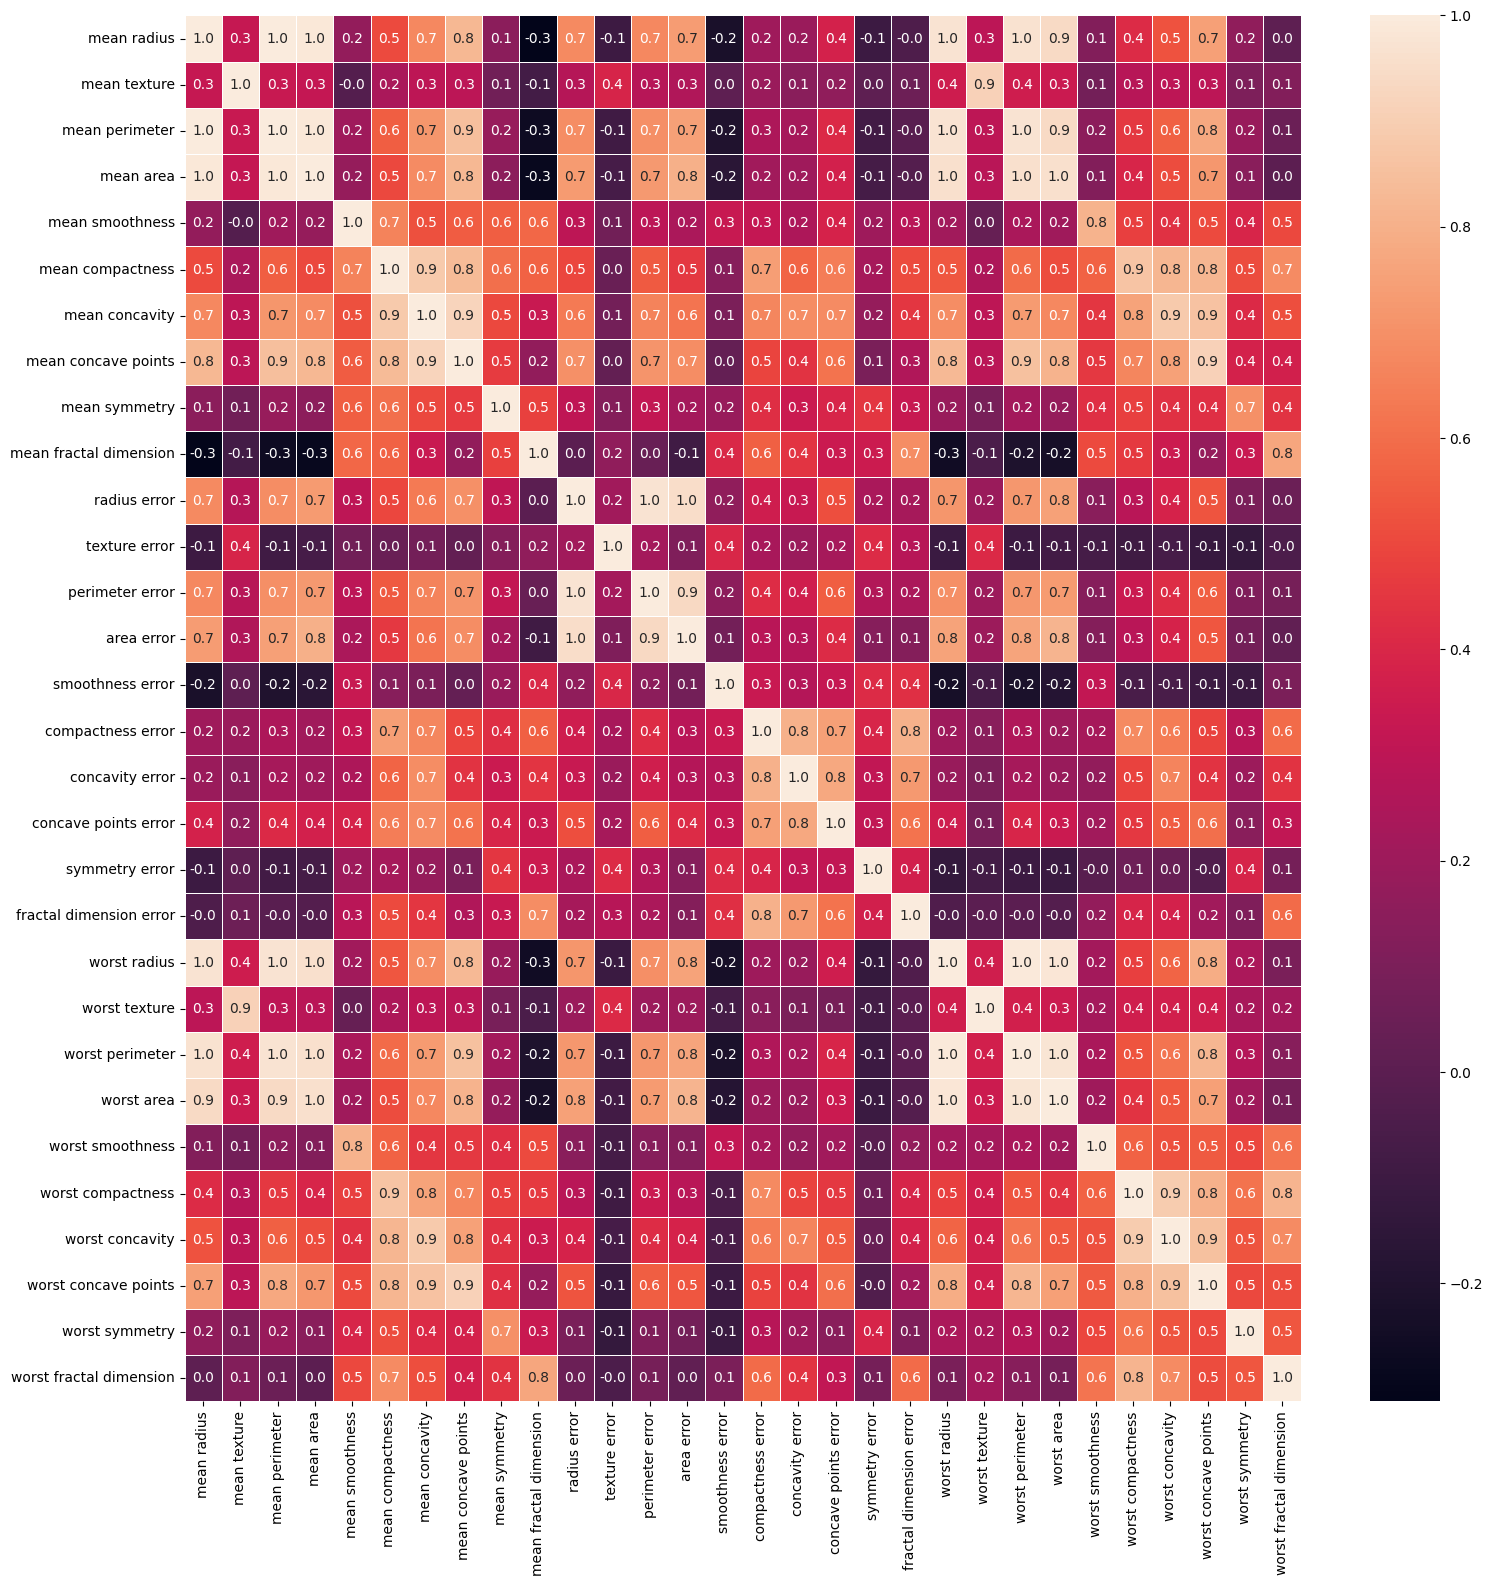

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(breast[features_name].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [11]:
m_corr = breast[features_name].corr()
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(m_corr[abs(m_corr)>=0.80],annot = True, fmt = '.2f')

<Axes: >

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


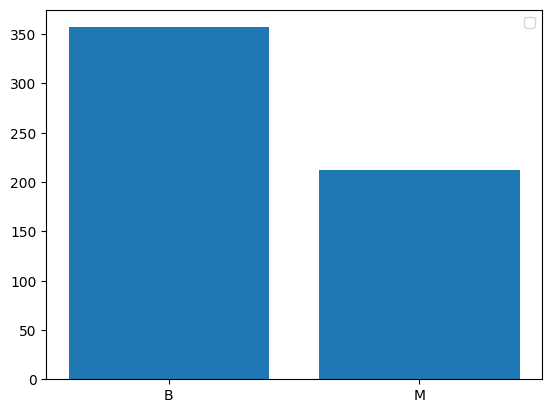

In [12]:
#Attention données légérement déséquilibrée
plt.bar(x=['B','M'], height=breast.target.value_counts())
plt.legend()

In [375]:
breast.target.value_counts()

1    357
0    212
Name: target, dtype: int64

#### 3) Recoder les variables si nécessaire


In [13]:
breast['target'] = breast.target.astype('int32')

In [14]:
# On affiche par lot de 10 feature
data_dia = breast.target
data = breast[features_name]
data_n_2 = (data - data.mean()) / (data.std())              # standardization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension')])

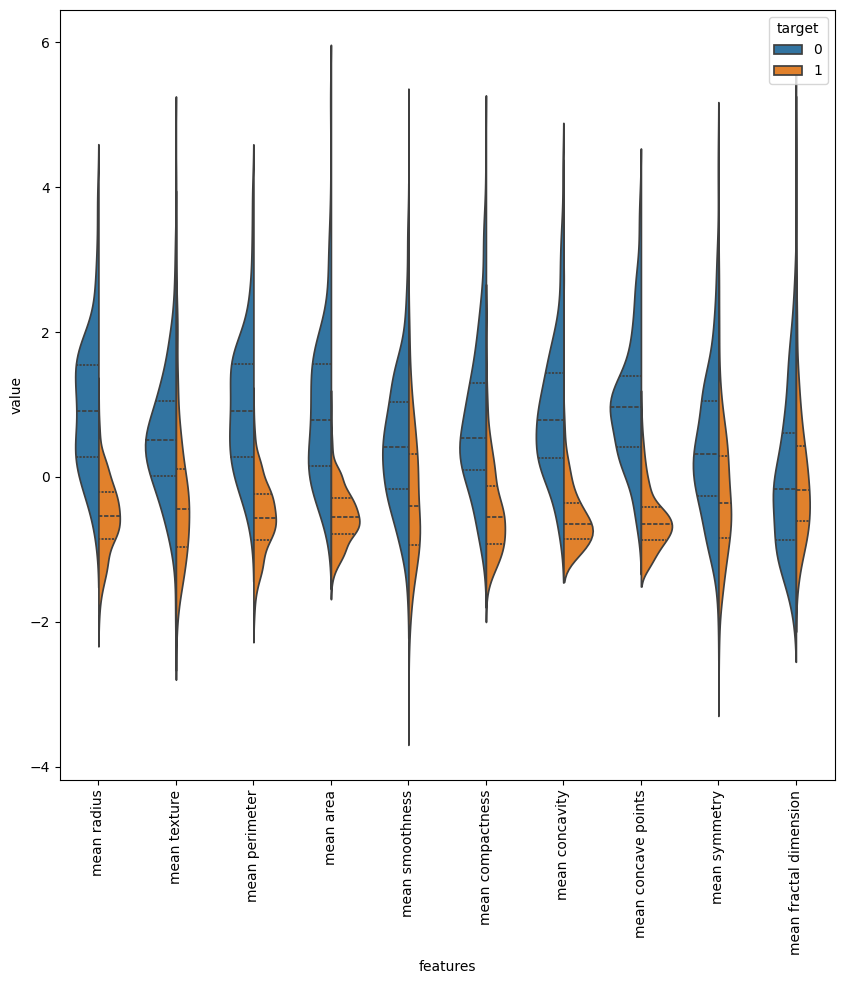

In [15]:
# On affiche pas lot de 10 feature
data_dia = breast.target
data = breast[features_name]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
#Melt permet de faire un pivot sur nos données
data = pd.concat([breast.target,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')

#Plt figure
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius error'),
  Text(1, 0, 'texture error'),
  Text(2, 0, 'perimeter error'),
  Text(3, 0, 'area error'),
  Text(4, 0, 'smoothness error'),
  Text(5, 0, 'compactness error'),
  Text(6, 0, 'concavity error'),
  Text(7, 0, 'concave points error'),
  Text(8, 0, 'symmetry error'),
  Text(9, 0, 'fractal dimension error')])

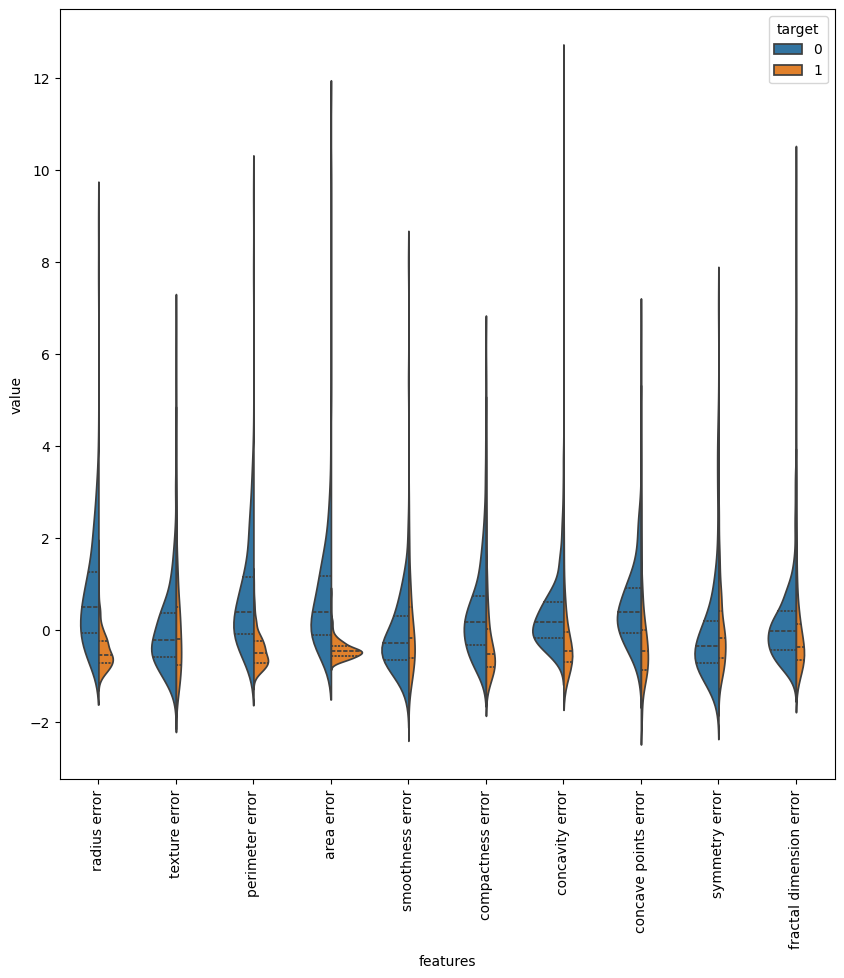

In [16]:
# On affiche pas lot de 10 feature
data_dia = breast.target
data = breast[features_name]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
#Melt permet de faire un pivot sur nos données
data = pd.concat([breast.target,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')

#Plt figure
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'worst radius'),
  Text(1, 0, 'worst texture'),
  Text(2, 0, 'worst perimeter'),
  Text(3, 0, 'worst area'),
  Text(4, 0, 'worst smoothness'),
  Text(5, 0, 'worst compactness'),
  Text(6, 0, 'worst concavity'),
  Text(7, 0, 'worst concave points'),
  Text(8, 0, 'worst symmetry'),
  Text(9, 0, 'worst fractal dimension')])

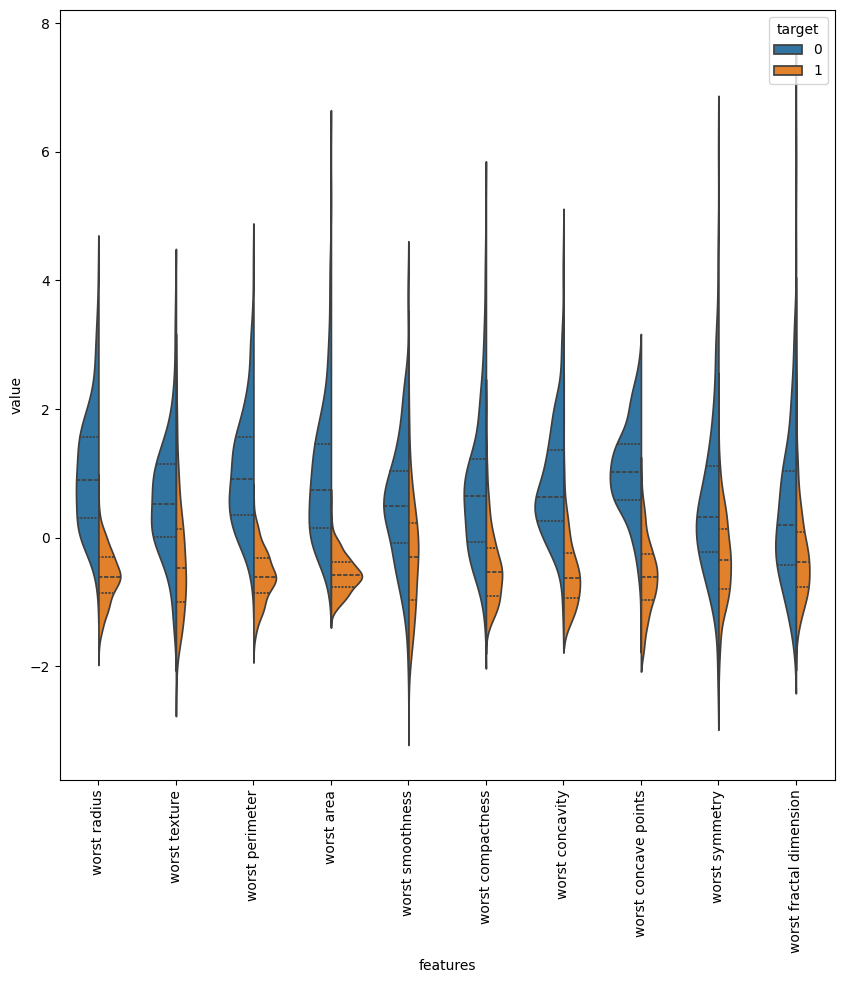

In [18]:
# On affiche pas lot de 10 feature
data_dia = breast.target
data = breast[features_name]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
#Melt permet de faire un pivot sur nos données
data = pd.concat([breast.target,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')

#Plt figure
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


In [19]:
#Nb de NA par feature

breast[features_name].isna().sum(axis=0)

#Iris.isna() retourne un true/false
#sum(axis=0) va faire la sum par colonne et true=1 false=0

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [367]:
#Il existe plusieurs méthodes pour réaliser une feature selection.

#De la plus simple qui s'appuie sur l'analyse statistique comme étude des corrélations
#Mais nous pouvons également utiliser des modèles pour rechercher les variables importantes pour notre modèle (random forest, modèle avec régularisation)
#Pour le TD nous choissons l'étude des corrélations

In [20]:
#On ne garde que la partie supérieur de la matrice de corrélation car symétrique
#On inclut pas la diagonale car variable corrlée à 100% avec elle même
upper_tri = m_corr.where(np.triu(np.ones(m_corr.shape),k=1).astype(np.bool))
print(upper_tri)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                      NaN      0.323782        0.997855   0.987357   
mean texture                     NaN           NaN        0.329533   0.321086   
mean perimeter                   NaN           NaN             NaN   0.986507   
mean area                        NaN           NaN             NaN        NaN   
mean smoothness                  NaN           NaN             NaN        NaN   
mean compactness                 NaN           NaN             NaN        NaN   
mean concavity                   NaN           NaN             NaN        NaN   
mean concave points              NaN           NaN             NaN        NaN   
mean symmetry                    NaN           NaN             NaN        NaN   
mean fractal dimension           NaN           NaN             NaN        NaN   
radius error                     NaN           NaN             NaN        NaN   
texture error               

In [21]:
#Suppresion des colonnes avec corrélation supérieur à 0.85
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)

['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


## Attention

Ce type de méthode pour éliminer les features corrélés permet d'avancer très vite mais n'est pas optimale.<br>
On supprimer les 2 variables corrélées mais parfois une des 2 pourrait être conservée car non corrélée avec les autres features

In [23]:
#Drop des colonnes
breast_no_corr = breast.drop(to_drop, axis=1)

In [24]:
breast_no_corr

mean radius  mean texture  mean smoothness  mean compactness  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean symmetry  mean fractal dimension  radius error  texture error  \
0           0.2419                 0.07871        1.0950         0.9053   
1           0.1812                 0.05667        0.5435         0.7339   
2           0.2069                 0.05999        0.7456         0.7869   
3           0.2597                 0.09744        0.4956         1.1560   
4           0.1809                 0.05883        0.7572         0.7813   
..             ...                     ...           ...            ...   
564         0.1726                 0.05623        1.1760         1.2560   
565         0.1752                 0.05533        0.7655         2.4630   
566         0.1590                 0.05648        0.4564         1.0750   
567         0.2397                 0.07016        0.7260         1.5950   
568         0.1587                 0.05884        0.3857         1.4280   

     smoothness error  compactness error  concavity error  \
0            0.006399            0.04904          0.05373   
1            0.005225            0.01308          0.01860   
2            0.006150            0.04006          0.03832   
3            0.009110            0.07458          0.05661   
4            0.011490            0.02461          0.05688   
..                ...                ...              ...   
564          0.010300            0.02891          0.05198   
565          0.005769            0.02423          0.03950   
566          0.005903            0.03731          0.04730   
567          0.006522            0.06158          0.07117   
568          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
3                 0.01867         0.05963                 0.009208   
4                 0.01885         0.01756                 0.005115   
..                    ...             ...                      ...   
564               0.02454         0.01114                 0.004239   
565               0.01678         0.01898                 0.002498   
566               0.01557         0.01318                 0.003892   
567               0.01664         0.02324                 0.006185   
568               0.00000         0.02676                 0.002783   

     worst smoothness  worst symmetry  worst fractal dimension  target  
0             0.16220          0.4601                  0.11890       0  
1             0.12380          0.2750                  0.08902       0  
2             0.14440          0.3613                  0.08758       0  
3             0.20980          0.6638                  0.17300       0  
4             0.13740          0.2364                  0.07678       0  
..                ...             ...                      ...     ...  
564           0.14100          0.2060                  0.07115       0  
565           0.11660          0.2572                  0.06637       0  
566           0.11390          0.2218       

## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [27]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
#lgr.fit(X_train_sc, y_train)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
#l_SVC.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)


#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)


#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [28]:
#Col names
list_two_col = breast_no_corr.iloc[:,0:2].columns

### Kernel : Poly

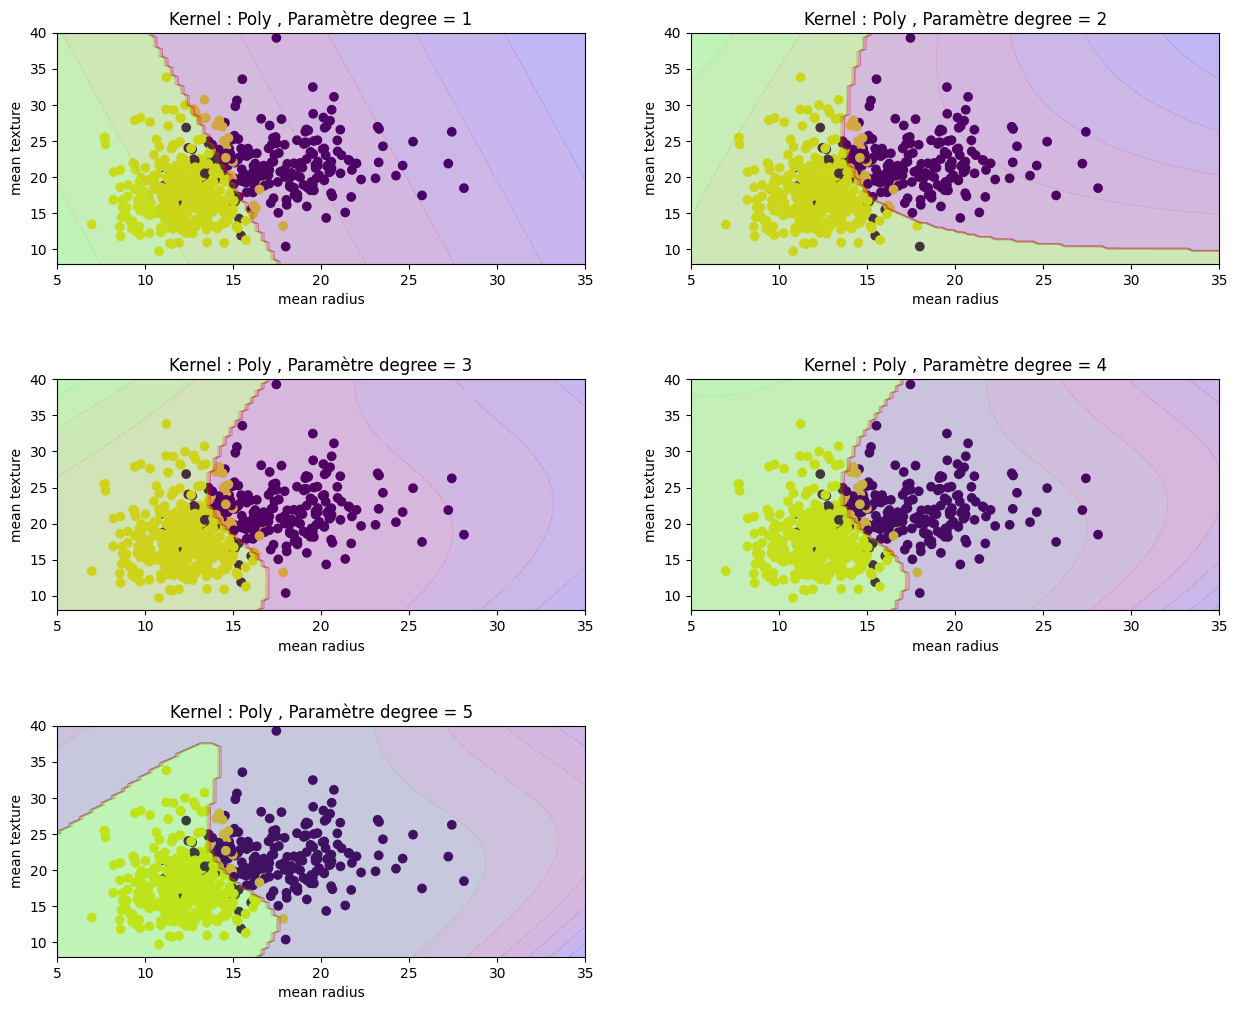

In [29]:
#Degree poly
d = [1,2,3,4,5]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(d):

    #Train
    class_svc = SVC( random_state=42 , kernel='poly', degree=int(j))
    class_svc.fit(breast_no_corr.iloc[:,0:2], breast_no_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(breast_no_corr.iloc[:,0], breast_no_corr.iloc[:,1], c=breast_no_corr.target)
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : Poly , Paramètre degree = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])

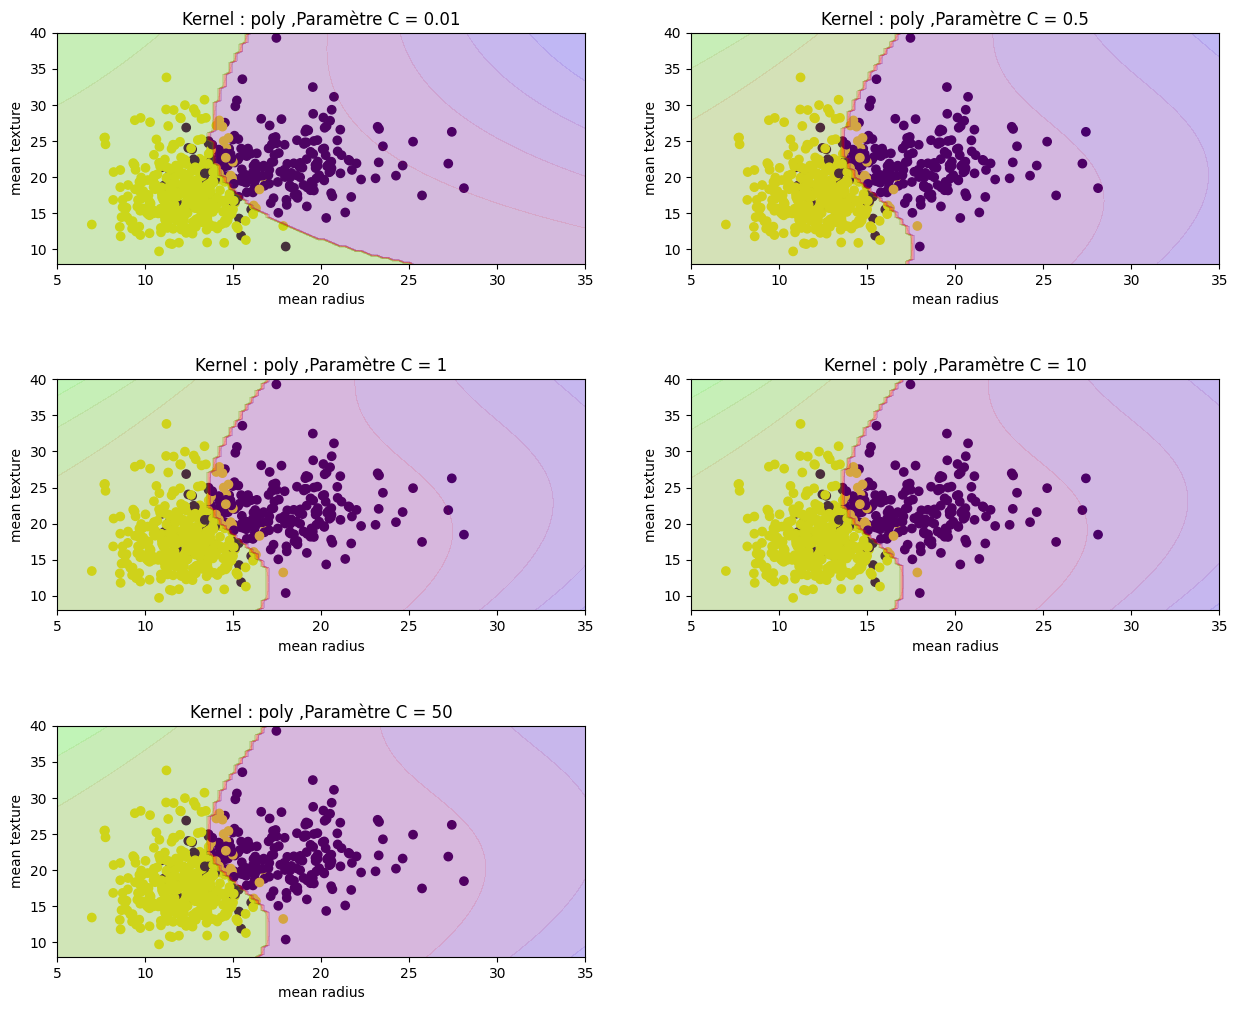

In [30]:
#Degree poly
C = [0.01, 0.5, 1, 10, 50]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(C):

    #Train
    class_svc = SVC(C=j ,random_state=42 , kernel='poly', degree=3)
    class_svc.fit(breast_no_corr.iloc[:,0:2], breast_no_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(breast_no_corr.iloc[:,0], breast_no_corr.iloc[:,1], c=breast_no_corr.target)
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : poly ,Paramètre C = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])

### Kernel : RBF

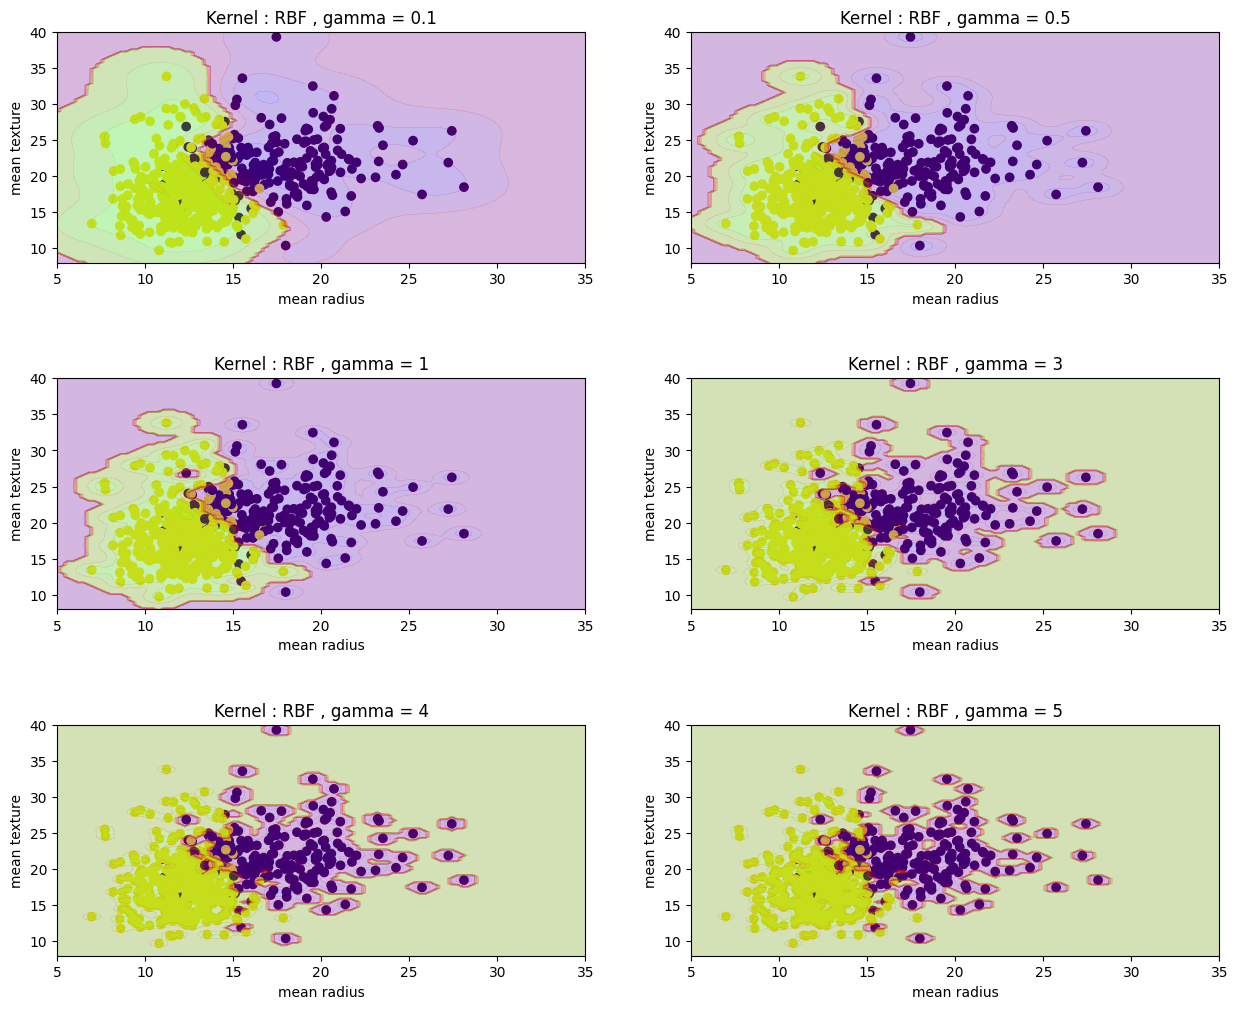

In [31]:
#Degree poly
gamma = [0.1,0.5,1,3,4,5]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(gamma):
    #Train
    class_svc = SVC( random_state=42 , kernel='rbf', gamma=j)
    class_svc.fit(breast_no_corr.iloc[:,0:2], breast_no_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(breast_no_corr.iloc[:,0], breast_no_corr.iloc[:,1], c=breast_no_corr.target)
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : RBF , gamma = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])

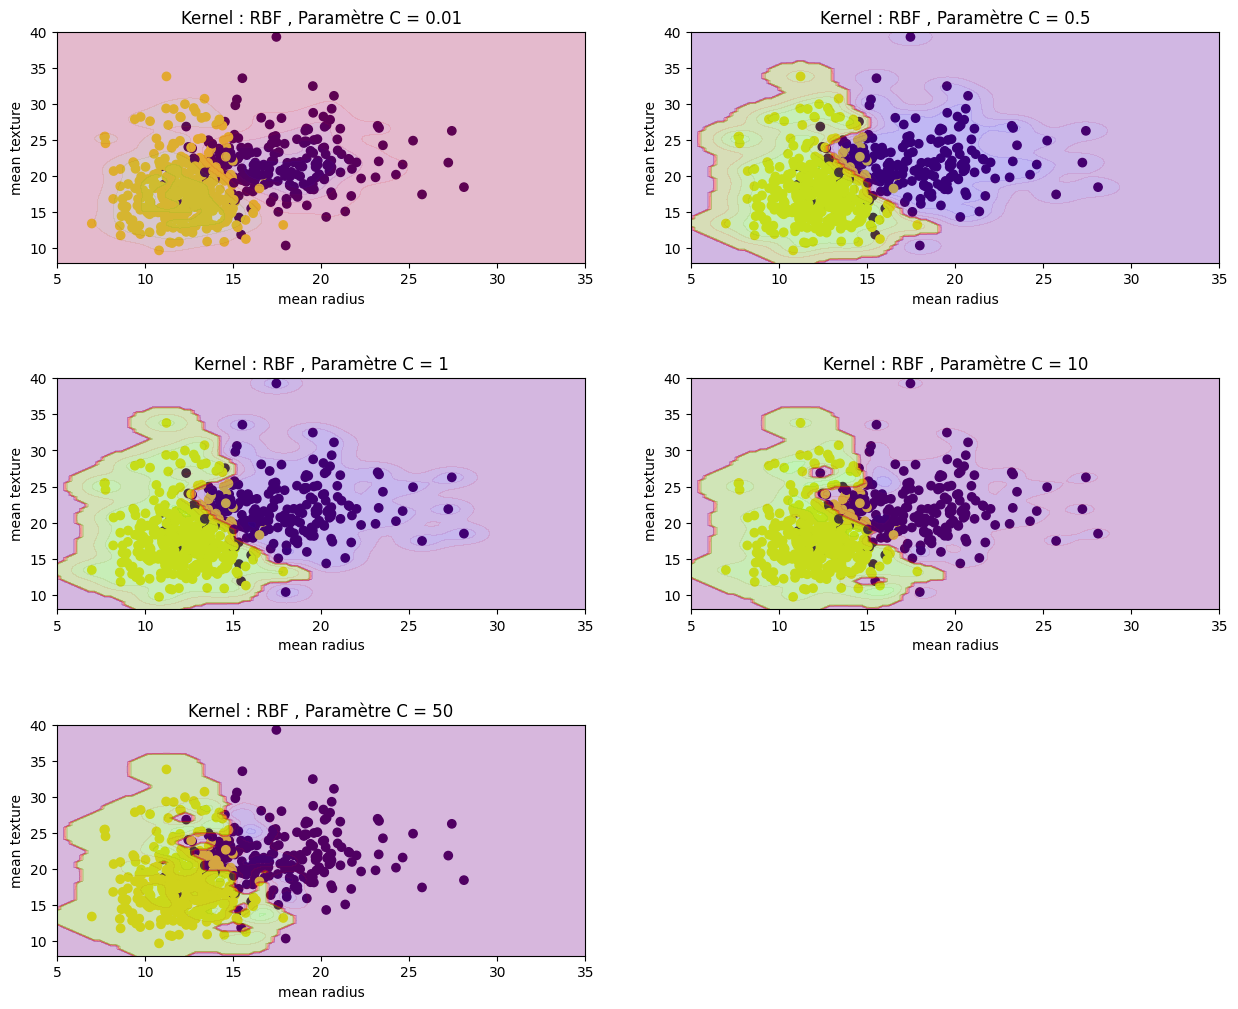

In [32]:
#Degree poly
C = [0.01, 0.5, 1, 10, 50]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(C):

    #Train
    class_svc = SVC(C=j ,random_state=42 , kernel='rbf', gamma=0.5)
    class_svc.fit(breast_no_corr.iloc[:,0:2], breast_no_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(breast_no_corr.iloc[:,0], breast_no_corr.iloc[:,1], c=breast_no_corr.target)
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : RBF , Paramètre C = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

Avant de vouloir modéliser il faut régler 2 problèmes :

- Le problème de imbalanced target

- Standardiser nos colonnes




In [33]:
#Features names
features_name_corr = breast_no_corr.columns[:-1]
df = breast_no_corr.copy()

#Winsorize outliers
for col in features_name_corr: 
     df[col] = winsorize(df[col], limits=0.05)

In [34]:
#Stratégie de undersampling. On peut aussi Upsample
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df.iloc[:,:-1], df.target)
print(X_resampled.shape)

(424, 17)


In [35]:
#Train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [36]:
#Scaling features

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [37]:
#Model

class_svc = SVC(C=0.1, random_state=42 , kernel='rbf', gamma=0.2)
class_svc.fit(X_train_sc, y_train)
print('Accuray train : ' + str(accuracy_score(y_train, class_svc.predict(X_train_sc))))
print('Accuray test : ' + str(accuracy_score(y_test, class_svc.predict(X_test_sc))))

Accuray train : 0.8997050147492626
Accuray test : 0.8235294117647058


In [38]:
#Model

class_svc = SVC(C=1, random_state=42 , kernel='poly', degree=1)
class_svc.fit(X_train_sc, y_train)
print('Accuray train : ' + str(accuracy_score(y_train, class_svc.predict(X_train_sc))))
print('Accuray test : ' + str(accuracy_score(y_test, class_svc.predict(X_test_sc))))

Accuray train : 0.9705014749262537
Accuray test : 0.9411764705882353


#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [55]:
# Get cross_val_score for each function

svc_poly = SVC(random_state=42 , kernel='poly')
cvs_svc_poly = cross_val_score(svc_poly, X_train_sc, y_train, cv=5, scoring='accuracy')

svc_rbf = SVC( random_state=42 , kernel='rbf' )
cvs_svc_rbf = cross_val_score(svc_rbf, X_train_sc, y_train, cv=5, scoring='accuracy')

svc_linear = SVC( random_state=42 , kernel='linear')
cvs_svc_linear = cross_val_score(svc_linear, X_train_sc, y_train, cv=5, scoring='accuracy')

In [40]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_svc_poly, cvs_svc_rbf, cvs_svc_linear]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['poly','rbf','linear']

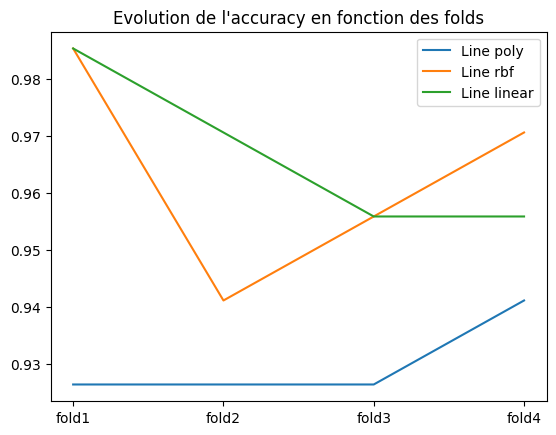

In [41]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

In [42]:
for i in range(3):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))
    


Le modèle N° 0 a une accuray de 0.9351624231782265 et un std : 0.012896460987817868
Le modèle N° 1 a une accuray de 0.9646180860403863 et un std : 0.016729892026882555
Le modèle N° 2 a une accuray de 0.9675592625109747 et un std : 0.01227913119425584


A ce stade vous pouvez:

- Regarder la matrice de confusion pour rentrer en détail de vos prédictions.

- Regarder les observations mal prédites et voir si elles possèdent une distribution différentes de nos données

- Changer votre feature engineering

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [43]:
#Tuning three kernels
params = [
    {"kernel": ["rbf"], "gamma": [0.01, 0.1,0.5,1,2], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree":[1,2,3,4],"C": [1, 10, 100, 1000]},
    {"kernel": ["linear"],"C": [1, 10, 100, 1000]}
]

c_svc = SVC(random_state=42)

grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)

In [44]:
take_grid = grid_c_svc.fit(X_train_sc, y_train)

In [384]:
#On garde le meilleur modèle et on refait un grid search uniquement sur ce modèle
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleur combinaison d'estimateur est: {'C': 1, 'kernel': 'linear'}
pour un score de: 0.9675592625109747


In [45]:
#Examiner tous les fold par ordre
results_df = pd.DataFrame(take_grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(results_df["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                 ).rename_axis("kernel")

results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

params  rank_test_score  \
kernel                                                                        
1_linear                      {'C': 1, 'kernel': 'linear'}                1   
10_1_poly         {'C': 10, 'degree': 1, 'kernel': 'poly'}                2   
1_1_poly           {'C': 1, 'degree': 1, 'kernel': 'poly'}                2   
10_0.01_rbf      {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}                4   
1_0.1_rbf          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}                5   
1000_0.1_rbf    {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}                6   
10_0.1_rbf        {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}                6   
100_0.1_rbf      {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}                6   
100_0.01_rbf    {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}                9   
100_1_poly       {'C': 100, 'degree': 1, 'kernel': 'poly'}               10   
100_linear                  {'C': 100, 'kernel': 'linear'}               11   
10_linear                    {'C': 10, 'kernel': 'linear'}               11   
10_3_poly         {'C': 10, 'degree': 3, 'kernel': 'poly'}               13   
1_0.01_rbf        {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}               14   
1000_1_poly     {'C': 1000, 'degree': 1, 'kernel': 'poly'}               15   
1000_3_poly     {'C': 1000, 'degree': 3, 'kernel': 'poly'}               16   
1000_0.01_rbf  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}               17   
1_3_poly           {'C': 1, 'degree': 3, 'kernel': 'poly'}               18   
100_3_poly       {'C': 100, 'degree': 3, 'kernel': 'poly'}               18   
1000_linear                {'C': 1000, 'kernel': 'linear'}               20   
1000_0.5_rbf    {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}               21   
10_0.5_rbf        {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}               21   
100_0.5_rbf      {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}               21   
1_0.5_rbf          {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}               24   
100_1_rbf          {'C': 100, 'gamma': 1, 'kernel': 'rbf'}               25   
10_1_rbf            {'C': 10, 'gamma': 1, 'kernel': 'rbf'}               25   
1000_1_rbf        {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}               25   
1_1_rbf              {'C': 1, 'gamma': 1, 'kernel': 'rbf'}               28   
1000_2_poly     {'C': 1000, 'degree': 2, 'kernel': 'poly'}               29   
100_2_poly       {'C': 100, 'degree': 2, 'kernel': 'poly'}               30   
100_4_poly       {'C': 100, 'degree': 4, 'kernel': 'poly'}               31   
10_2_poly         {'C': 10, 'degree': 2, 'kernel': 'poly'}               32   
10_4_poly         {'C': 10, 'degree': 4, 'kernel': 'poly'}               33   
1_2_poly           {'C': 1, 'degree': 2, 'kernel': 'poly'}               34   
1000_4_poly     {'C': 1000, 'degree': 4, 'kernel': 'poly'}               35   
1_4_poly           {'C': 1, 'degree': 4, 'kernel': 'poly'}               36   
100_2_rbf          {'C': 100, 'gamma': 2, 'kernel': 'rbf'}               37   
10_2_rbf            {'C': 10, 'gamma': 2, 'kernel': 'rbf'}               37   
1000_2_rbf        {'C': 1000, 'gamma': 2, 'kernel': 'rbf'}               37   
1_2_rbf              {'C': 1, 'gamma': 2, 'kernel': 'rbf'}               40   

               mean_test_score  std_test_score  
kernel                                          
1_linear              0.967559        0.010983  
10_1_poly             0.964618        0.014964  
1_1_poly              0.964618        0.019923  
10_0.01_rbf           0.961633        0.007316  
1_0.1_rbf             0.958780        0.021559  
1000_0.1_rbf          0.955751        0.016112  
10_0.1_rbf            0.955751        0.016112  
100_0.1_rbf           0.955751        0.016112  
100_0.01_rbf          0.955707        0.009581  
100_1_poly            0.952766        0.011197  
100_linear            0.946839        0.017907  
10_linear             0.946839        0.017907  
10_3_poly             0.943986        0.017061 

In [48]:
#Tuning two kernel
params = [
    {"kernel": ["rbf"], "gamma": [0.001,0.005,0.01], "C": [1, 10]},
    {"kernel": ["poly"], "degree":[1],"C": [1, 10]},
    {"kernel": ["linear"],"C": [1, 10]}
]

c_svc = SVC(random_state=42)

grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)
take_grid = grid_c_svc.fit(X_train_sc, y_train)

In [49]:
results_df = pd.DataFrame(take_grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(results_df["params"]\
                                  .apply(lambda x: "_".join(str(val) for val in x.values()))
                                 ).rename_axis("kernel")

results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

params  rank_test_score  \
kernel                                                                      
1_linear                    {'C': 1, 'kernel': 'linear'}                1   
1_1_poly         {'C': 1, 'degree': 1, 'kernel': 'poly'}                2   
10_1_poly       {'C': 10, 'degree': 1, 'kernel': 'poly'}                2   
10_0.005_rbf  {'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}                4   
10_0.01_rbf    {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}                5   
10_0.001_rbf  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}                6   
10_linear                  {'C': 10, 'kernel': 'linear'}                7   
1_0.01_rbf      {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}                8   
1_0.005_rbf    {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}                9   
1_0.001_rbf    {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}               10   

              mean_test_score  std_test_score  
kernel                                         
1_linear             0.967559        0.010983  
1_1_poly             0.964618        0.019923  
10_1_poly            0.964618        0.014964  
10_0.005_rbf         0.961677        0.011700  
10_0.01_rbf          0.961633        0.007316  
10_0.001_rbf         0.949824        0.011901  
10_linear            0.946839        0.017907  
1_0.01_rbf           0.943898        0.023698  
1_0.005_rbf          0.935031        0.027507  
1_0.001_rbf          0.902634        0.015130

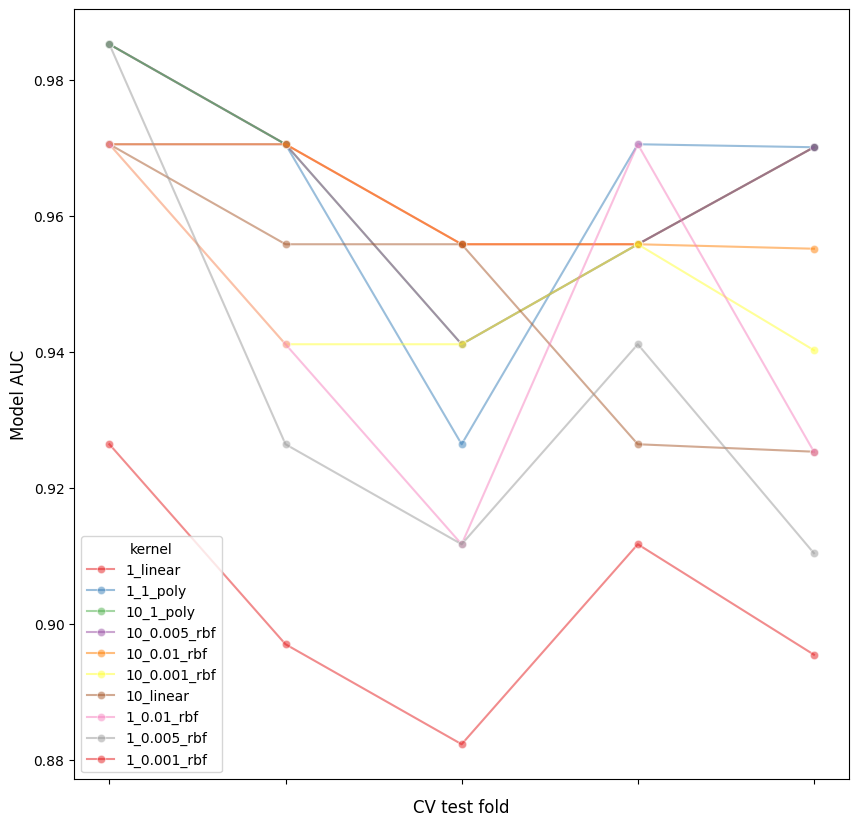

In [50]:
# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores

fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()



Notre meilleur modèle est aussi le plus simple :)! 
**Il s'agit du svm linéaire avec c=1**

## on entraine notre dernier modèle

In [51]:
best_model = SVC(random_state=42, C=1, kernel='linear')

In [52]:
best_model.fit(X_train_sc, y_train)

SVC(C=1, kernel='linear', random_state=42)

<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 300x200 with 0 Axes>

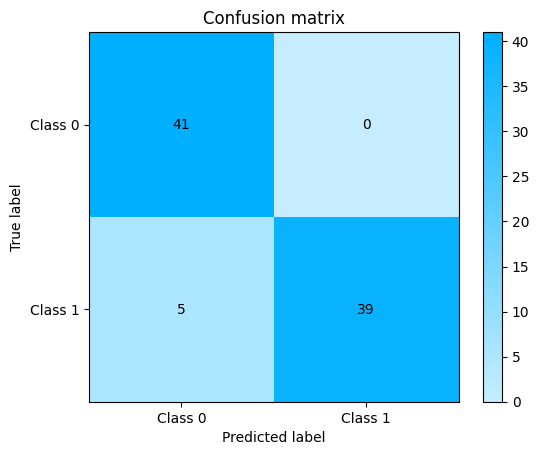

In [53]:
plt.figure(figsize=(3,2))
plot.confusion_matrix(best_model.predict(X_test_sc), y_test)

In [54]:
print('Training score: ' + str(best_model.score(X_train_sc,y_train)), 
      '\n',
      'Test score: ' + str(best_model.score(X_test_sc, y_test))
     )
 
    

Training score: 0.9823008849557522 
 Test score: 0.9411764705882353


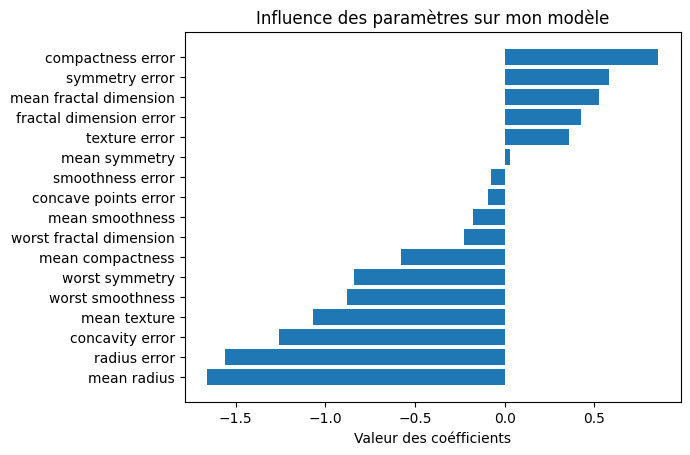

In [365]:
plt.title('Influence des paramètres sur mon modèle')
plt.xlabel('Valeur des coéfficients')
svm_f_importances(best_model.coef_[0], features_name_corr)


<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>